# EDA Assignment

In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
print("🔹 First 10 Rows of the Dataset:")
df.head()

🔹 First 10 Rows of the Dataset:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
print(" Shape of the dataset:")
df.shape

 Shape of the dataset:


(1061, 7)

In [5]:
print("Column Names:")
df.columns

Column Names:


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

### 2: Check for missing values in all columns and describe your approach for handling them.

In [6]:
print(" Missing Values in Each Column:")
df.isnull().sum()

 Missing Values in Each Column:


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

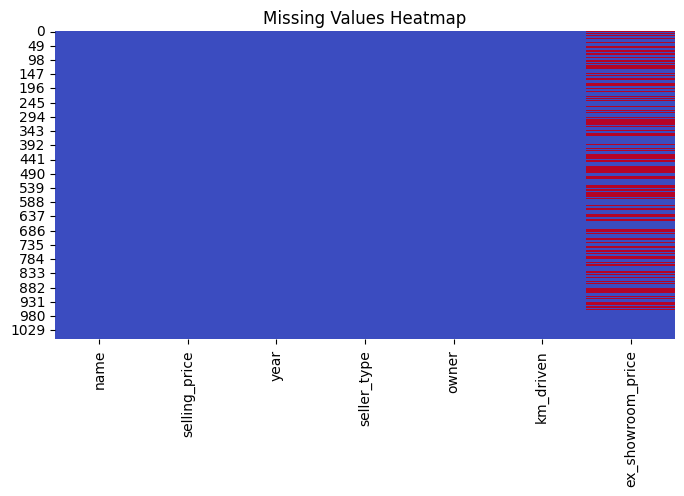

In [7]:
# Visualize missing values using seaborn heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

### Approach for handling missing values:

For numerical columns → fill missing values with the median (less affected by outliers).

For categorical columns → fill missing values with the mode (most frequent value).

If a column has too many missing values (e.g., >40–50%), consider dropping it.

### 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

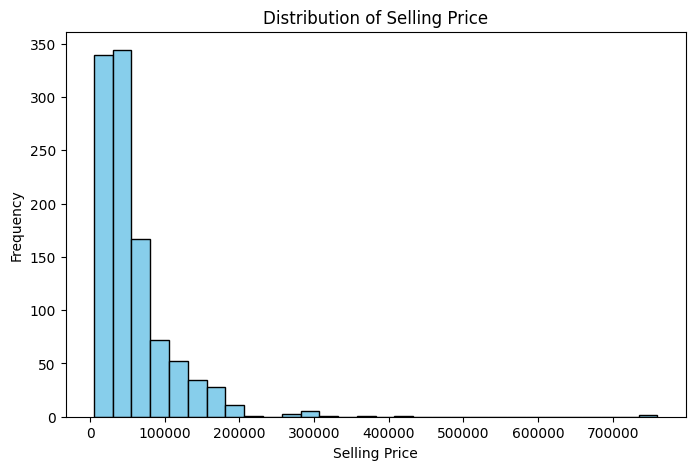

In [8]:
# Plot distribution of selling_price using histogram
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


🔹 Overall Trend (Observation):

The distribution of selling prices is right-skewed (positively skewed) —
most bikes are sold at lower prices, while fewer bikes have very high prices.

This indicates that budget or mid-range bikes dominate the dataset,
and only a small number of premium bikes have very high selling prices.

### 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

Average Selling Price by Seller Type:
seller_type
Individual    59711.923223
Dealer        46666.666667
Name: selling_price, dtype: float64


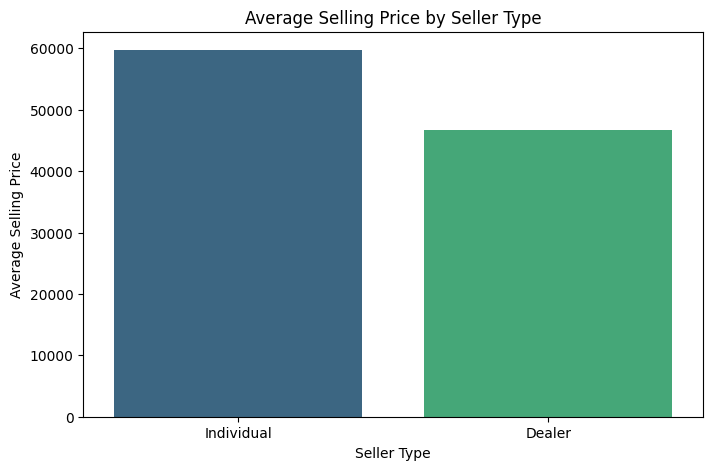

In [9]:
# Calculate average selling price for each seller_type
avg_price = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Display the result
print("Average Selling Price by Seller Type:")
print(avg_price)

# Plot the bar graph
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()


🔹 Observation:

The average selling price is highest for Trustmark Dealers, followed by Dealers,
while Individual sellers tend to list bikes at comparatively lower prices.

This suggests that certified or authorized sellers often sell higher-end or well-maintained bikes.

### 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


Average km_driven by Ownership Type:
owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


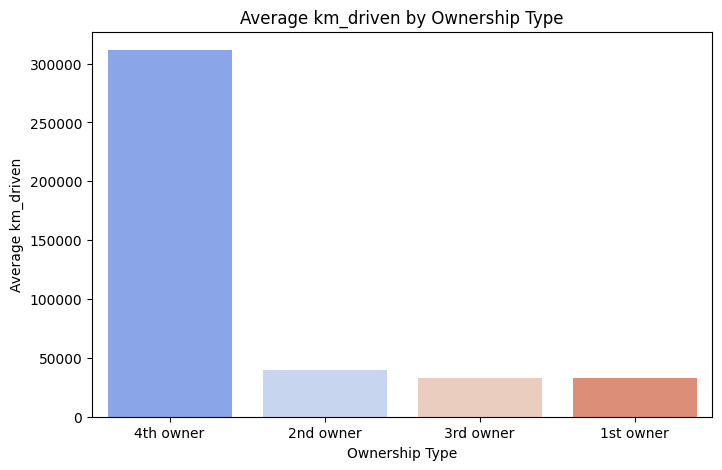

In [10]:
# Compute average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

# Display the result
print("Average km_driven by Ownership Type:")
print(avg_km)

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=avg_km.index, y=avg_km.values, palette='coolwarm')
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.show()


🔹 Observation:

Higher ownership levels (like 3rd or 4th owner) generally show more kilometers driven,
while 1st owners or test drive vehicles have lower mileage.

This indicates that as the bike changes hands, its usage increases —
a common trend in the second-hand bike market.

### 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

🔹 Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

🔹 After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


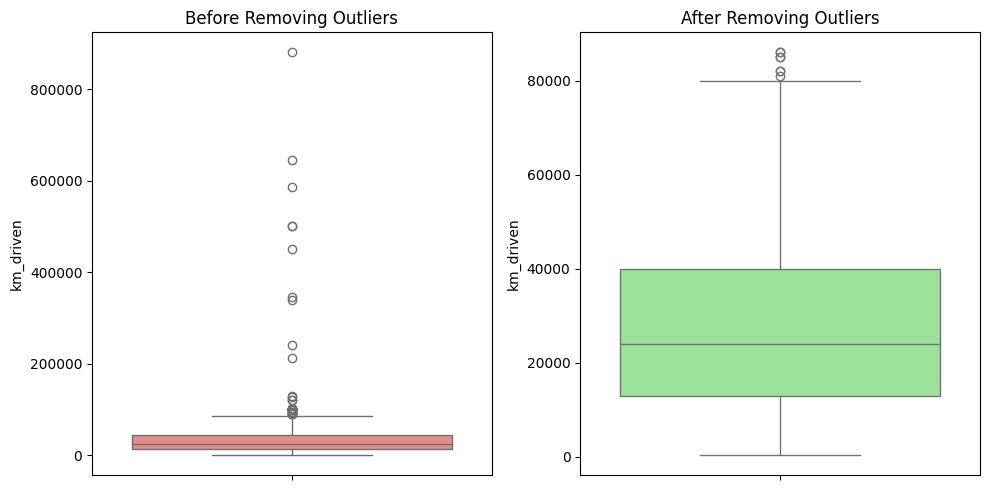

In [11]:
# Show summary statistics before removing outliers
print("🔹 Before Removing Outliers:")
print(df['km_driven'].describe())

# Calculate IQR (Interquartile Range)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_iqr = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]

# Show summary statistics after removing outliers
print("\n🔹 After Removing Outliers:")
print(df_iqr['km_driven'].describe())

# Optional: Compare before and after visually
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['km_driven'], color='lightcoral')
plt.title("Before Removing Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=df_iqr['km_driven'], color='lightgreen')
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()


🔹 Observation:

After removing outliers, the maximum value of km_driven decreased significantly,
and the mean and standard deviation became smaller.
This shows that extreme values were effectively removed,
leading to a cleaner and more balanced dataset for analysis and modeling.

### 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

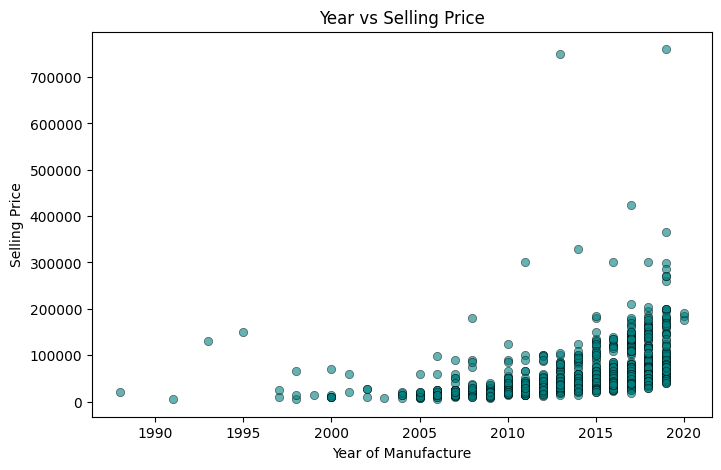

In [12]:
# Scatter plot for Year vs Selling Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6, color='teal', edgecolor='black')

plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


🔹 Observation:

The scatter plot shows a clear positive relationship between manufacture year and selling price.

Newer bikes (recent years) generally have higher selling prices.

Older bikes show lower resale values, as expected due to depreciation and usage.

This indicates that a bike’s age strongly affects its resale price — one of the key factors in price prediction models.

### 8:Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [13]:
# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='Seller', drop_first=False)

# Display the first 5 rows of the new DataFrame
print("🔹 DataFrame after One-Hot Encoding:")
display(df_encoded.head())


🔹 DataFrame after One-Hot Encoding:


,name,selling_price,year,owner,km_driven,ex_showroom_price,Seller_Dealer,Seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


* Observation:

After one-hot encoding, the categorical column seller_type is now represented by multiple numeric columns (Seller_Dealer, Seller_Individual, etc.),
which makes the dataset suitable for use in machine learning models.

### 9:Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

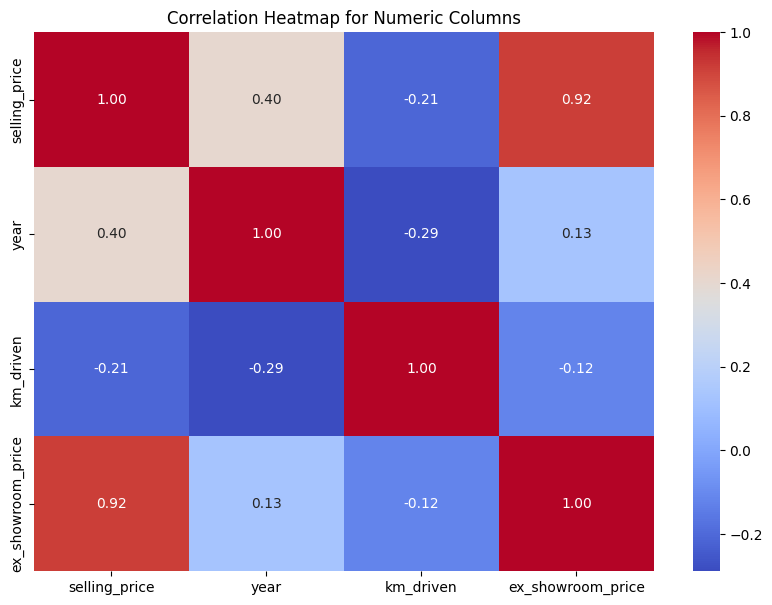

In [14]:
# Select numeric columns
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Generate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()


🔹 Typical Observations (varies by dataset):

year and selling_price show a strong positive correlation — newer bikes have higher prices.

km_driven and selling_price show a negative correlation — bikes with higher mileage usually sell for less.

Other features (like seller type dummies) show smaller or weaker correlations.

### 10:Summarize your findings in a brief report:

#### Findings Report:

1️⃣ Key Factors Affecting Selling Price:

Year: Newer bikes (recent manufacturing years) have higher prices.

km_driven: More kilometers driven leads to lower resale value.

Seller Type: Trustmark Dealers tend to list bikes at higher average prices than Individuals.

----------------

2️⃣ Data Cleaning & Feature Engineering Performed:

Checked and handled missing values using median (numerical) and mode (categorical).

Removed outliers in km_driven using the IQR method.

Created visualizations (histograms, bar plots, scatter plots, heatmap) for better understanding.

Applied one-hot encoding to convert categorical data (seller_type) into numeric form.

-----------

3️⃣ Overall Insights:

The dataset is generally clean and well-structured.

Bike age and mileage are the most influential factors on resale price.

The analysis can help develop a price prediction model or support used-bike dealership strategies.